In [1]:
#Importamos todas las librerias a utilizar
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gs
import seaborn as sns
import plotly
import plotly.express as px
from matplotlib import style
from sklearn.impute import KNNImputer
from sklearn.linear_model import LinearRegression
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 150)
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import preprocessing

#para los modelos de regresion
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor

#para los modelos de redes neuronales
from tensorflow.keras import Model, Input
from tensorflow.keras import layers
from tensorflow.keras.metrics import AUC
from tensorflow.keras.utils import to_categorical
from xgboost import XGBRegressor

#math
from statistics import mean
from math import sqrt
from sklearn.metrics import plot_confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_squared_error

pip install shap

In [2]:
# Funcion para calcular la distancia entre dos puntos a través de la función haversine,
# esto nos permite convertir coordenadas en unidades de distancia
from math import radians, cos, sin, asin, sqrt
def DistanciaGPS (lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    # Convertimos grados decimales en radianes
           
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    # Se utiliza la formula Haversine
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arcsin(sqrt(a)) 
    # Radius of earth in kilometers is 6371
    km = 6371* c
    return km

In [3]:
#Funcion Dummy
# Definimos la función que nos ayudara a crear los dummies para alimentar el modelo

def dummy_convert (df,ID_ESTRUC):

    estruturas = pd.get_dummies(df[ID_ESTRUC], prefix = ID_ESTRUC)
    df = pd.concat([df, estruturas], axis = 1, )

    return df

In [4]:
df=pd.ExcelFile('Dataset7.xlsx')
df1 = pd.read_excel(df, na_values='?')
df1.head()

,TKNUM,WERKS,FECHA_DESP,KUNNR,IDEOBRA,MATNR,FORMULA,ID_ESTRUC,ID_MODALIDAD,ID_MODALIDAD_2,VBELN_PED,VBELN_ENTREGA,Fec. Prod,Doc. Transporte,Estado,Placa,Cliente,Descripción de Obra,Pto. Exped,V. Entregado,H. Program,Tiempo de Proceso 1,Tiempo de Proceso 2,Tiempo Proceso Minutos,Traslado a Obra 1,Traslado a Obra 2,Tiempo Translado Minutos,Espera en Obra 1,Espera en Obra 2,Tiempo Espera Minutos,Descarga en Obra 1,Descarga en Obra 2,Tiempo Descarga Minutos,Retorno as Planta 1,Retorno as Planta 2,Tiempo Retorno Planta Minutos,Dif. Total,Reconstruido,WERK LAT,WERK LON,Código de Obra,OBRA LON,OBRA LAT,DESCRIPCION,Fecha_DiaSem,FinSemana,FinMes,T.Proceso,T.Traslado,T.Espera,T.Descarga,T.Retorno,T.Ciclo WT,T.Ciclo Calc (T5-PROD),Asentamiento,Asentamiento_Agr,Tipo Obra,Tipo Estructura,Tipo Estructura Negocio,FRANJA_HORARIA,PRED_T.DESC_PLANTA
0,1732932,1213,05.08.2019,50006802,9000038274,004-01588,C210-I-H57-A4,16,1,1,200399000,2001325815,2019-08-06 08:44:00.000000,1732932,-1/Llegada a Planta,T3H-928,S/C,816098,DINO TRUJILLO NORTE,8.0,2019-08-03 06:59:59.999999,NaT,2019-08-06 07:54:00,-,2019-08-06 07:54:00,2019-08-06 11:40:00,03:46:00,2019-08-06 11:40:00,2019-08-06 11:56:00,00:16:00,2019-08-06 11:56:00,2019-08-06 12:49:00.000000,00:53:00,2019-08-06 12:49:00.000000,2019-08-06 12:51:00.000001,00:02:00,06:06:00,NaN,-8.053661,-79.061618,9000038274,-79.063383,-8.059475,PISOS,2,0,0,NaN,226.0,16.0,53,2.0,NaN,247,A3,A3,Pequeña,5,3,2,120
1,1742807,1213,21.08.2019,11588638,9000033374,004-01626,C280-MS-H67-A5,16,1,1,200401326,2001332963,2019-08-21 08:28:00.000000,1742807,-1/Llegada a Planta,T8W-933,S/C,816615,DINO TRUJILLO NORTE,NaN,NaT,NaT,2019-08-21 09:47:00,-,2019-08-21 09:47:00,2019-08-21 10:12:00,00:25:00,2019-08-21 10:12:00,2019-08-21 10:42:00,00:30:00,2019-08-21 10:42:00,2019-08-21 11:03:00.000000,00:21:00,2019-08-21 11:03:00.000000,2019-08-21 11:29:00.000000,00:26:00,05:00:00,NaN,-8.053661,-79.061618,9000033374,-79.099240,-8.102218,PISOS,3,0,0,NaN,25.0,30.0,21,26.0,NaN,181,A3,A3,Pequeña,5,3,2,120
2,1742809,1213,21.08.2019,13171955,9000030626,004-02808,M1:5-I-A5,18,17,2,200401413,2001332965,2019-08-21 08:33:59.999999,1742809,-1/Llegada a Planta,ASN-882,S/C,809638,DINO TRUJILLO NORTE,NaN,NaT,NaT,2019-08-21 10:03:00,-,2019-08-21 10:03:00,2019-08-21 10:41:00,00:38:00,2019-08-21 10:41:00,2019-08-21 10:44:00,00:03:00,2019-08-21 10:44:00,2019-08-21 12:21:00.000000,01:37:00,2019-08-21 12:21:00.000000,2019-08-21 13:09:00.000000,00:48:00,04:19:00,NaN,-8.053661,-79.061618,9000030626,-79.034438,-8.140475,CONTRAPISO,3,0,0,NaN,38.0,3.0,97,48.0,NaN,275,A3,A3,Pequeña,7,4,2,50
3,1742817,1203,21.08.2019,50010990,9000034745,004-01773,C280-MS-H57-A5,16,2,2,200401350,2001332977,2019-08-21 08:43:00.000000,1742817,-1/Llegada a Planta,B2R-918,S/C,814583,DINO PIURA,NaN,NaT,NaT,2019-08-21 10:02:00,-,2019-08-21 10:02:00,2019-08-21 10:10:00,00:08:00,2019-08-21 10:10:00,2019-08-21 10:32:00,00:22:00,2019-08-21 10:32:00,2019-08-21 11:00:00.000001,00:28:00,2019-08-21 11:00:00.000001,2019-08-21 11:12:00.000000,00:12:00,04:28:00,NaN,-5.164840,-80.718861,9000034745,-80.689045,-5.160834,PISOS,3,0,0,NaN,8.0,22.0,28,12.0,NaN,149,A3,A3,Pequeña,5,2,2,120
4,1742824,1213,21.08.2019,11588638,9000033374,004-01626,C280-MS-H67-A5,16,1,1,200401326,2001332984,2019-08-21 08:49:00.000000,1742824,-1/Llegada a Planta,ATN-707,S/C,816615,DINO TRUJILLO NORTE,NaN,NaT,NaT,2019-08-21 07:35:00,-,2019-08-21 07:35:00,2019-08-21 08:03:00,00:28:00,2019-08-21 08:03:00,2019-08-21 08:20:00,00:17:00,2019-08-21 08:20:00,2019-08-21 08:38:00.000000,00:18:00,2019-08-21 08:38:00.000000,2019-08-21 09:01:00.000000,00:23:00,02:04:00,NaN,-8.053661,-79.061618,9000033374,-79.099240,-8.102218,PISOS,3,0,0,NaN,28.0,17.0,18,23.0,NaN,12,A3,A3,Pequeña,5,3,2,120


In [5]:
df1.describe()

,TKNUM,WERKS,KUNNR,IDEOBRA,ID_ESTRUC,ID_MODALIDAD,ID_MODALIDAD_2,VBELN_PED,VBELN_ENTREGA,Doc. Transporte,V. Entregado,WERK LAT,WERK LON,Código de Obra,OBRA LON,OBRA LAT,Fecha_DiaSem,FinSemana,FinMes,T.Proceso,T.Traslado,T.Espera,T.Descarga,T.Retorno,T.Ciclo WT,T.Ciclo Calc (T5-PROD),Tipo Estructura,Tipo Estructura Negocio,FRANJA_HORARIA,PRED_T.DESC_PLANTA
count,4.568300e+04,45683.000000,4.568300e+04,4.568300e+04,45683.000000,45683.000000,45683.000000,4.568300e+04,4.568300e+04,4.568300e+04,45663.000000,45683.000000,45683.000000,4.568300e+04,45683.000000,45683.000000,45683.000000,45683.000000,45683.000000,36381.000000,45583.000000,44096.000000,45683.000000,45629.000000,0.0,45683.000000,45683.000000,45683.000000,45683.000000,45683.000000
mean,1.881342e+06,1294.981525,4.081508e+08,9.000040e+09,15.020839,2.593963,1.589016,2.004308e+08,2.001418e+09,1.881342e+06,6.952842,-6.574729,-79.866183,9.000040e+09,-79.840712,-6.560917,3.635116,0.185933,0.058906,25.577554,36.387315,20.901737,50.401397,34.044336,NaN,163.039008,5.379288,2.574284,2.332990,52.340696
std,7.865022e+04,552.323317,7.224024e+08,7.106254e+03,10.199198,4.048725,0.492018,1.593887e+04,4.307120e+04,7.865022e+04,1.486866,1.504203,1.051754,7.106254e+03,1.047739,1.516327,1.744686,0.389057,0.235451,29.958588,32.656368,21.512166,36.015488,29.401365,NaN,77.200891,1.666237,0.947678,1.037502,27.766093
min,1.732932e+06,1203.000000,1.001540e+07,9.000002e+09,1.000000,1.000000,1.000000,2.003542e+08,2.001326e+09,1.732932e+06,0.050000,-9.103467,-81.274960,9.000002e+09,-81.283977,-9.485182,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,6.000000,1.000000,NaN,-1297.000000,3.000000,1.000000,0.000000,15.000000
25%,1.815408e+06,1203.000000,3.952222e+07,9.000036e+09,8.000000,1.000000,1.000000,2.004176e+08,2.001382e+09,1.815408e+06,6.000000,-8.138488,-80.718861,9.000036e+09,-80.671711,-8.103004,2.000000,0.000000,0.000000,18.000000,16.000000,7.000000,24.000000,13.000000,NaN,114.000000,4.000000,2.000000,2.000000,30.000000
50%,1.869401e+06,1213.000000,5.000660e+07,9.000039e+09,11.000000,2.000000,2.000000,2.004308e+08,2.001417e+09,1.869401e+06,8.000000,-6.779977,-79.880310,9.000039e+09,-79.841797,-6.763263,4.000000,0.000000,0.000000,22.000000,28.000000,14.000000,40.000000,25.000000,NaN,155.000000,5.000000,2.000000,2.000000,45.000000
75%,1.946688e+06,1219.000000,5.010094e+07,9.000045e+09,16.000000,2.000000,2.000000,2.004447e+08,2.001456e+09,1.946688e+06,8.000000,-5.164840,-79.010054,9.000045e+09,-79.029879,-5.151050,5.000000,0.000000,0.000000,27.000000,46.000000,28.000000,66.000000,45.000000,NaN,207.000000,6.000000,3.000000,3.000000,60.000000
max,2.029674e+06,5212.000000,1.900005e+09,9.000056e+09,50.000000,22.000000,2.000000,2.004580e+08,2.001491e+09,2.029674e+06,9.750000,-4.599295,-76.339073,9.000056e+09,-76.135900,-4.558264,7.000000,1.000000,1.000000,1289.000000,1190.000000,206.000000,338.000000,322.000000,NaN,400.000000,11.000000,12.000000,4.000000,120.000000


In [6]:
df1['T.Descarga'].describe()

count    45683.000000
mean        50.401397
std         36.015488
min          6.000000
25%         24.000000
50%         40.000000
75%         66.000000
max        338.000000
Name: T.Descarga, dtype: float64

In [7]:
# Podemos observar la cantidad de valores nulos que se encuentran en la data
df1.isnull().sum()

TKNUM                                 0
WERKS                                 0
FECHA_DESP                            0
KUNNR                                 0
IDEOBRA                               0
MATNR                                 0
FORMULA                               0
ID_ESTRUC                             0
ID_MODALIDAD                          0
ID_MODALIDAD_2                        0
VBELN_PED                             0
VBELN_ENTREGA                         0
Fec. Prod                             0
Doc. Transporte                       0
Estado                                0
Placa                                 0
Cliente                               0
Descripción de Obra                   0
Pto. Exped                            0
V. Entregado                         20
H. Program                           20
Tiempo de Proceso 1                8518
Tiempo de Proceso 2                   0
Tiempo Proceso Minutos              138
Traslado a Obra 1                     0


In [8]:
# Es necesario estandarizar el formato de las columnas y eliminar los espacios para trabajar de manera mas fluida
df1.columns

Index(['TKNUM  ', 'WERKS', 'FECHA_DESP', 'KUNNR     ', 'IDEOBRA   ', 'MATNR    ', 'FORMULA                       ', 'ID_ESTRUC', 'ID_MODALIDAD',
       'ID_MODALIDAD_2', 'VBELN_PED', 'VBELN_ENTREGA', 'Fec. Prod', 'Doc. Transporte', 'Estado', 'Placa', 'Cliente', 'Descripción de Obra',
       'Pto. Exped', 'V. Entregado', 'H. Program', 'Tiempo de Proceso 1', 'Tiempo de Proceso 2', 'Tiempo Proceso Minutos', 'Traslado a Obra 1',
       'Traslado a Obra 2', 'Tiempo Translado Minutos', 'Espera en Obra 1', 'Espera en Obra 2', 'Tiempo Espera Minutos', 'Descarga en Obra 1',
       'Descarga en Obra 2', 'Tiempo Descarga Minutos', 'Retorno as Planta 1', 'Retorno as Planta 2', 'Tiempo Retorno Planta Minutos', 'Dif. Total',
       'Reconstruido', 'WERK LAT', 'WERK LON', '  Código de Obra', 'OBRA LON', 'OBRA LAT', 'DESCRIPCION', 'Fecha_DiaSem', 'FinSemana', 'FinMes',
       'T.Proceso', 'T.Traslado', 'T.Espera', 'T.Descarga', 'T.Retorno', 'T.Ciclo WT', 'T.Ciclo Calc (T5-PROD)', 'Asentamiento', 'Asen

In [9]:
# procedemos a crear un diccionario con los nuevos valores de columnas
df1.rename(columns={'TKNUM  ' : 'TKNUM',
                    'WERKS' : 'WERKS',
                    'FECHA_DESP' : 'FECHA_DESP',
                    'KUNNR     ' : 'KUNNR',
                    'IDEOBRA   ' : 'IDEOBRA',
                    'MATNR    ' : 'MATNR',
                    'FORMULA                       ' : 'FORMULA',
                    'ID_ESTRUC' : 'ID_ESTRUC',
                    'ID_MODALIDAD' : 'ID_MODALIDAD',
                    'ID_MODALIDAD_2' : 'ID_MODALIDAD_2',
                    'VBELN_PED' : 'VBELN_PED',
                    'VBELN_ENTREGA' : 'VBELN_ENTREGA',
                    'Fec. Prod': 'FEC_PROD',
                    'Doc. Transporte' : 'DOC_TRANS',
                    '  Código de Obra' : 'OBRA_COD',
                    'DES_ESTRUCTURA' : 'DES_ESTRUCTURA',
                    'Estado': 'ESTADO',
                    'Placa': 'PLACA',
                    'Cliente': 'CLIENTE',
                    'Descripción de Obra': 'DESC_OBRA',
                    'Pto. Exped': 'PTO_EXPED',
                    'V. Entregado' : 'V_ENTREGADO',
                    'H. Program' : 'H_PROGRAM',
                    'Tiempo de Proceso 1' : 'TPROCESO1',
                    'Tiempo de Proceso 2' : 'TPROCESO2',
                    'Tiempo Proceso' : 'TPROCESO',
                    'Traslado a Obra 1' : 'TRASLADO1',
                    'Traslado a Obra 2' : 'TRASLADO 2',
                    'Tiempo Translado Minutos' : 'TRASLADO',                     
                    'Espera en Obra 1': 'ESPERA1',
                    'Espera en Obra 2': 'ESPERA2',
                    'Tiempo Espera Minutos': 'TESPERA',
                    'Descarga en Obra 1' : 'DESCARGA1',
                    'Descarga en Obra 2' : 'DESCARGA2',
                    'Tiempo Descarga Minutos': 'TDESCARGA',
                    'Retorno as Planta 1': 'RETORNO1',
                    'Retorno as Planta 2': 'RETORNO2',
                    'Tiempo Retorno Planta Minutos': 'TRETORNO',
                    'Dif. Total': 'DIFTOTAL',
                    'T.Proceso' : 'TPROCESOTOTAL',
                    'T.Traslado' : 'TTRASLADOTOTAL',
                    'T.Espera' : 'TESPERATOTAL',
                    'T.Descarga': 'TDESCARGATOTAL',
                    'T.Retorno' : 'TRETORNOTOTAL',
                    'Dia' : 'DIA',
                    'Fecha_DiaSem' : 'DIASEMANA',
                    'FinSemana' : 'FINSEMANA', 
                    'T.Ciclo Calc (T5-PROD)': 'T5PROD', 
                    'Asentamiento' : 'ASENT', 
                    'Asentamiento_Agr' : 'ASENTAGR',  
                    'Tipo Obra': 'OBRATIPO',
                    'Eliminar' : 'ELIMINAR',
                    'FinMes': 'FINMES',
                    'WERK LON' : 'WERK_LON',
                    'WERK LAT' : 'WERK_LAT' ,
                    'OBRA LAT': 'OBRA_LAT',
                    'OBRA LON' : 'OBRA_LON',
                    'Tipo Estructura' : 'TIPO_ESTRUC',
                    'Tipo Estructura Negocio' : 'TIPO_ESTRUC_NEG',
                    'FRANJA_HORARIA' : 'FRANJA_HORARIA',
                    'PRED_T.DESC_PLANTA' : 'PRED_T.DESC_PLANTA' 
                   },
            inplace=True)



In [10]:
# Creamos la columna distancia basandonos en la funcion definida para su calculo y se llenan las filas con los valores obtenidos
df1["DISTANCIA"]=df1.apply(lambda x: DistanciaGPS(x['WERK_LON'],x["WERK_LAT"],x["OBRA_LON"],x["OBRA_LAT"]),axis = 1)
# Redondeamos para tener valores enteros
df1["DISTANCIA"] = df1["DISTANCIA"].apply(np.round)
df1["DISTANCIA"]

0         1.0
1         7.0
2        10.0
3         3.0
4         7.0
         ... 
45678     9.0
45679     4.0
45680    28.0
45681     2.0
45682     9.0
Name: DISTANCIA, Length: 45683, dtype: float64

In [11]:
print(df1.columns.tolist())

['TKNUM', 'WERKS', 'FECHA_DESP', 'KUNNR', 'IDEOBRA', 'MATNR', 'FORMULA', 'ID_ESTRUC', 'ID_MODALIDAD', 'ID_MODALIDAD_2', 'VBELN_PED', 'VBELN_ENTREGA', 'FEC_PROD', 'DOC_TRANS', 'ESTADO', 'PLACA', 'CLIENTE', 'DESC_OBRA', 'PTO_EXPED', 'V_ENTREGADO', 'H_PROGRAM', 'TPROCESO1', 'TPROCESO2', 'Tiempo Proceso Minutos', 'TRASLADO1', 'TRASLADO 2', 'TRASLADO', 'ESPERA1', 'ESPERA2', 'TESPERA', 'DESCARGA1', 'DESCARGA2', 'TDESCARGA', 'RETORNO1', 'RETORNO2', 'TRETORNO', 'DIFTOTAL', 'Reconstruido', 'WERK_LAT', 'WERK_LON', 'OBRA_COD', 'OBRA_LON', 'OBRA_LAT', 'DESCRIPCION', 'DIASEMANA', 'FINSEMANA', 'FINMES', 'TPROCESOTOTAL', 'TTRASLADOTOTAL', 'TESPERATOTAL', 'TDESCARGATOTAL', 'TRETORNOTOTAL', 'T.Ciclo WT', 'T5PROD', 'ASENT', 'ASENTAGR', 'OBRATIPO', 'TIPO_ESTRUC', 'TIPO_ESTRUC_NEG', 'FRANJA_HORARIA', 'PRED_T.DESC_PLANTA', 'DISTANCIA']


In [12]:
#Eliminamos 20 valores nulos de la columna V_Entregado ya que no tienen relevancia estadística y son pedidos no procesados
df1.dropna(subset = ["V_ENTREGADO"], inplace=True)
index = df1[(df1['TDESCARGATOTAL'] >= 300)|(df1['TDESCARGATOTAL'] <= 6)].index
df1.drop(index, inplace=True)
index = df1[(df1['V_ENTREGADO'] > 8)|(df1['V_ENTREGADO'] <= 0.5)].index
df1.drop(index, inplace=True)
index = df1[(df1['DISTANCIA'] >= 200)|(df1['DISTANCIA'] <= 1)].index
df1.drop(index, inplace=True)
index = df1[(df1['T5PROD'] >= 400)|(df1['T5PROD'] <= 20)].index
df1.drop(index, inplace=True)
index = df1[df1['WERKS'] == 1253].index
df1.drop(index, inplace=True)

df1.reset_index(drop=True, inplace=True)
df1

,TKNUM,WERKS,FECHA_DESP,KUNNR,IDEOBRA,MATNR,FORMULA,ID_ESTRUC,ID_MODALIDAD,ID_MODALIDAD_2,VBELN_PED,VBELN_ENTREGA,FEC_PROD,DOC_TRANS,ESTADO,PLACA,CLIENTE,DESC_OBRA,PTO_EXPED,V_ENTREGADO,H_PROGRAM,TPROCESO1,TPROCESO2,Tiempo Proceso Minutos,TRASLADO1,TRASLADO 2,TRASLADO,ESPERA1,ESPERA2,TESPERA,DESCARGA1,DESCARGA2,TDESCARGA,RETORNO1,RETORNO2,TRETORNO,DIFTOTAL,Reconstruido,WERK_LAT,WERK_LON,OBRA_COD,OBRA_LON,OBRA_LAT,DESCRIPCION,DIASEMANA,FINSEMANA,FINMES,TPROCESOTOTAL,TTRASLADOTOTAL,TESPERATOTAL,TDESCARGATOTAL,TRETORNOTOTAL,T.Ciclo WT,T5PROD,ASENT,ASENTAGR,OBRATIPO,TIPO_ESTRUC,TIPO_ESTRUC_NEG,FRANJA_HORARIA,PRED_T.DESC_PLANTA,DISTANCIA
0,1743102,1213,21.08.2019,13171955,9000030626,004-03773,C210-MS-H8-A8/CV,8,17,2,200401413,2001333174,2019-08-21 13:36:00.000001,1743102,-1/Llegada a Planta,ASN-882,S/C,809638,DINO TRUJILLO NORTE,5.0,2019-08-20 09:30:00.000001,NaT,2019-08-21 14:59:00.000000,-,2019-08-21 14:59:00.000000,2019-08-21 15:33:00.000000,00:34:00,2019-08-21 15:33:00.000000,2019-08-21 15:33:00.000000,1899-12-29 00:00:00,2019-08-21 15:33:00.000000,2019-08-21 17:00:00.000001,01:27:00,2019-08-21 17:00:00.000001,2019-08-21 17:36:00.000000,00:36:00,04:25:00,NaN,-8.053661,-79.061618,9000030626,-79.034438,-8.140475,PLACAS,3,0,0,NaN,34.0,NaN,87,36.0,NaN,240,A3,A3,Pequeña,6,4,3,20,10.0
1,1743105,1203,21.08.2019,50010990,9000034745,004-01773,C280-MS-H57-A5,16,2,2,200401350,2001333177,2019-08-21 13:47:00.000000,1743105,-1/Llegada a Planta,T4M-876,S/C,814583,DINO PIURA,8.0,2019-08-20 08:00:00.000001,NaT,2019-08-21 15:14:59.999999,-,2019-08-21 15:14:59.999999,2019-08-21 15:24:00.000000,00:09:00,2019-08-21 15:24:00.000000,2019-08-21 15:33:00.000000,00:09:00,2019-08-21 15:33:00.000000,2019-08-21 16:13:00.000000,00:40:00,2019-08-21 16:13:00.000000,2019-08-21 16:35:00.000000,00:22:00,02:57:00,NaN,-5.164840,-80.718861,9000034745,-80.689045,-5.160834,PISOS,3,0,0,NaN,9.0,9.0,40,22.0,NaN,168,A3,A3,Pequeña,5,2,3,120,3.0
2,1743106,1213,21.08.2019,39760908,9000035521,004-03692,C210-I-H67-A5,3,2,2,200401410,2001333178,2019-08-21 13:48:00.000000,1743106,-1/Llegada a Planta,T8W-924,S/C,814346,DINO TRUJILLO NORTE,4.0,2019-08-20 11:00:00.000001,NaT,2019-08-21 15:10:00.000001,-,2019-08-21 15:10:00.000001,2019-08-21 15:32:00.000000,00:22:00,2019-08-21 15:32:00.000000,2019-08-21 15:40:00.000000,00:08:00,2019-08-21 15:40:00.000000,2019-08-21 15:59:00.000000,00:19:00,2019-08-21 15:59:00.000000,2019-08-21 17:00:00.000001,01:01:00,03:16:00,NaN,-8.053661,-79.061618,9000035521,-79.029655,-8.107172,ZAPATAS,3,0,0,NaN,22.0,8.0,19,61.0,NaN,192,A3,A3,Pequeña,3,2,3,25,7.0
3,1743111,1203,21.08.2019,50011903,9000033156,004-01611,C175-I-H67-A5,12,2,2,200401312,2001333183,2019-08-21 14:04:00.000000,1743111,-1/Llegada a Planta,F6N-933,S/C,807926,DINO PIURA,8.0,2019-08-20 14:29:59.999999,NaT,2019-08-21 15:28:00.000000,-,2019-08-21 15:28:00.000000,2019-08-21 15:46:00.000000,00:18:00,2019-08-21 15:46:00.000000,2019-08-21 16:06:00.000000,00:20:00,2019-08-21 16:06:00.000000,2019-08-21 16:55:00.000000,00:49:00,2019-08-21 16:55:00.000000,2019-08-21 17:14:00.000000,00:19:00,02:51:00,NaN,-5.164840,-80.718861,9000033156,-80.668644,-5.171846,MUROS,3,0,0,NaN,18.0,20.0,49,19.0,NaN,190,A3,A3,Mediana,6,2,3,50,6.0
4,1743119,1213,21.08.2019,13171955,9000036127,004-01642,C210-MS-H67-A7,11,17,2,200401411,2001333190,2019-08-21 14:26:00.000000,1743119,-1/Llegada a Planta,T8O-918,S/C,814313,DINO TRUJILLO NORTE,8.0,2019-08-20 12:59:59.999999,NaT,2019-08-21 15:49:00.000000,-,2019-08-21 15:49:00.000000,2019-08-21 16:07:00.000000,00:18:00,2019-08-21 16:07:00.000000,2019-08-21 16:19:00.000000,00:12:00,2019-08-21 16:19:00.000000,2019-08-21 17:04:00.000000,00:45:00,2019-08-21 17:04:00.000000,2019-08-21 17:22:00.000000,00:18:00,02:46:00,NaN,-8.053661,-79.061618,9000036127,-79.037930,-8.102648,LOSA ALIGERADA,3,0,0,NaN,18.0,12.0,45,18.0,NaN,176,A3,A3,Pequeña,4,4,3,45,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [13]:
df1['TDESCARGATOTAL'].describe()

count    36298.000000
mean        46.803488
std         33.016458
min          7.000000
25%         23.000000
50%         37.000000
75%         60.000000
max        297.000000
Name: TDESCARGATOTAL, dtype: float64

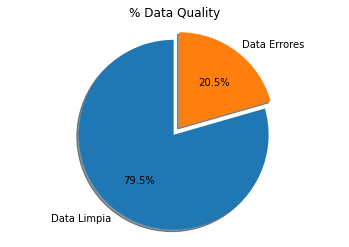

In [14]:
labels = 'Data Limpia', 'Data Errores'
okey = len(df1)/45683
malas = (45683 - len(df1))/45683
sizes = [okey, malas]
explode = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('% Data Quality')
plt.show()

<AxesSubplot:xlabel='TDESCARGATOTAL'>

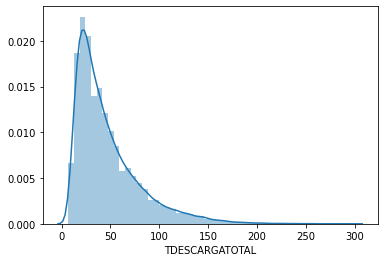

In [15]:
sns.distplot(df1['TDESCARGATOTAL'])

<AxesSubplot:xlabel='TDESCARGATOTAL'>

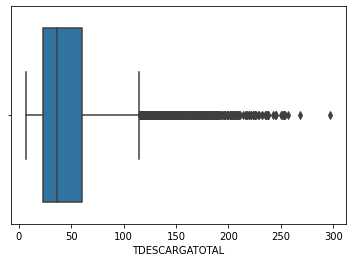

In [16]:
sns.boxplot(x=df1['TDESCARGATOTAL'])

<AxesSubplot:xlabel='Error_Planta'>

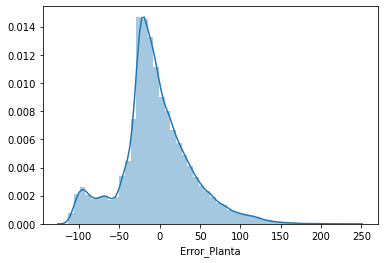

In [17]:
df1["Error_Planta"] = df1["TDESCARGATOTAL"] - df1["PRED_T.DESC_PLANTA"]
sns.distplot(df1['Error_Planta'])

<AxesSubplot:xlabel='Error_Planta'>

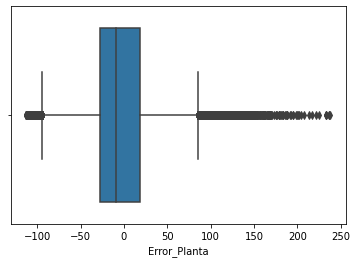

In [18]:
sns.boxplot(x=df1['Error_Planta'])

In [19]:
df1['Error_Planta'].describe()

count    36298.000000
mean        -4.995234
std         44.175073
min       -113.000000
25%        -27.000000
50%         -9.000000
75%         18.000000
max        238.000000
Name: Error_Planta, dtype: float64

In [20]:
sqrt(mean_squared_error(df1["TDESCARGATOTAL"],df1["PRED_T.DESC_PLANTA"]))

44.45599665205112

In [21]:
df2 =df1.copy()

In [22]:
# Creamos variables dummy para cada una de las variables descriptivas que inferimos podrian incidir en el tiempo de descarga

df2=dummy_convert(df2,"TIPO_ESTRUC") #aplica la funcion para ID_Estruc
df2=dummy_convert(df2,"WERKS") #aplica la fucntion para Werks
df2=dummy_convert(df2, "ID_MODALIDAD_2") #aplica la funcion para Modalidad
df2=dummy_convert(df2, "ASENT") #aplica la funcion para Asentamiento
df2=dummy_convert(df2, "ASENTAGR") #aplica la funcion para Asentamiento agregado
df2=dummy_convert(df2, 'OBRATIPO') #aplica la funcion para clasificación de tipo de obra
df2=dummy_convert(df2, 'DIASEMANA') #aplica la funcion para diferenciar los dias de la semana
df2=dummy_convert(df2,"TIPO_ESTRUC_NEG") #aplica la funcion para ID_Estruc_NEG
df2=dummy_convert(df2,"FRANJA_HORARIA") #aplica la funcion para franja horaria, mañana tarde noche madrugada
df2=dummy_convert(df2,"ID_ESTRUC") #aplica la funcion para franja horaria, mañana tarde noche madrugada

In [23]:
# Obtenemos un analisis de la estadística de la data con los dummies creados
df2.describe()

,TKNUM,WERKS,KUNNR,IDEOBRA,ID_ESTRUC,ID_MODALIDAD,ID_MODALIDAD_2,VBELN_PED,VBELN_ENTREGA,DOC_TRANS,V_ENTREGADO,WERK_LAT,WERK_LON,OBRA_COD,OBRA_LON,OBRA_LAT,DIASEMANA,FINSEMANA,FINMES,TPROCESOTOTAL,TTRASLADOTOTAL,TESPERATOTAL,TDESCARGATOTAL,TRETORNOTOTAL,T.Ciclo WT,T5PROD,TIPO_ESTRUC,TIPO_ESTRUC_NEG,FRANJA_HORARIA,PRED_T.DESC_PLANTA,DISTANCIA,Error_Planta,TIPO_ESTRUC_3,TIPO_ESTRUC_4,TIPO_ESTRUC_5,TIPO_ESTRUC_6,TIPO_ESTRUC_7,TIPO_ESTRUC_8,TIPO_ESTRUC_9,TIPO_ESTRUC_10,TIPO_ESTRUC_11,WERKS_1203,WERKS_1207,WERKS_1209,WERKS_1211,WERKS_1213,WERKS_1217,WERKS_1219,WERKS_5202,WERKS_5212,ID_MODALIDAD_2_1,ID_MODALIDAD_2_2,ASENT_A3,ASENT_A4,ASENT_A5,ASENT_A6,ASENT_A7,ASENT_A8,ASENT_A9,ASENTAGR_A3,ASENTAGR_A4,ASENTAGR_A5-A6,ASENTAGR_A7-A8,ASENTAGR_A9,OBRATIPO_Grande,OBRATIPO_Mediana,OBRATIPO_Pequeña,DIASEMANA_1,DIASEMANA_2,DIASEMANA_3,DIASEMANA_4,DIASEMANA_5,DIASEMANA_6,DIASEMANA_7,TIPO_ESTRUC_NEG_1,TIPO_ESTRUC_NEG_2,TIPO_ESTRUC_NEG_3,TIPO_ESTRUC_NEG_4,TIPO_ESTRUC_NEG_5,TIPO_ESTRUC_NEG_7,TIPO_ESTRUC_NEG_11,TIPO_ESTRUC_NEG_12,FRANJA_HORARIA_0,FRANJA_HORARIA_1,FRANJA_HORARIA_2,FRANJA_HORARIA_3,FRANJA_HORARIA_4,ID_ESTRUC_1,ID_ESTRUC_2,ID_ESTRUC_3,ID_ESTRUC_4,ID_ESTRUC_5,ID_ESTRUC_6,ID_ESTRUC_7,ID_ESTRUC_8,ID_ESTRUC_9,ID_ESTRUC_10,ID_ESTRUC_11,ID_ESTRUC_12,ID_ESTRUC_13,ID_ESTRUC_14,ID_ESTRUC_15,ID_ESTRUC_16,ID_ESTRUC_17,ID_ESTRUC_18,ID_ESTRUC_19,ID_ESTRUC_20,ID_ESTRUC_21,ID_ESTRUC_22,ID_ESTRUC_23,ID_ESTRUC_24,ID_ESTRUC_25,ID_ESTRUC_26,ID_ESTRUC_27,ID_ESTRUC_28,ID_ESTRUC_29,ID_ESTRUC_30,ID_ESTRUC_31,ID_ESTRUC_32,ID_ESTRUC_33,ID_ESTRUC_34,ID_ESTRUC_35,ID_ESTRUC_36,ID_ESTRUC_37,ID_ESTRUC_38,ID_ESTRUC_39,ID_ESTRUC_40,ID_ESTRUC_42,ID_ESTRUC_43,ID_ESTRUC_44,ID_ESTRUC_45,ID_ESTRUC_46,ID_ESTRUC_47,ID_ESTRUC_48,ID_ESTRUC_49,ID_ESTRUC_50
count,3.629800e+04,36298.000000,3.629800e+04,3.629800e+04,36298.000000,36298.000000,36298.000000,3.629800e+04,3.629800e+04,3.629800e+04,36298.000000,36298.000000,36298.000000,3.629800e+04,36298.000000,36298.000000,36298.000000,36298.000000,36298.000000,29672.000000,36248.000000,35855.000000,36298.000000,36282.000000,0.0,36298.000000,36298.000000,36298.000000,36298.000000,36298.000000,36298.000000,36298.000000,36298.000000,36298.000000,36298.000000,36298.000000,36298.000000,36298.000000,36298.000000,36298.000000,36298.000000,36298.000000,36298.000000,36298.000000,36298.000000,36298.000000,36298.000000,36298.000000,36298.000000,36298.000000,36298.000000,36298.000000,36298.000000,36298.000000,36298.000000,36298.000000,36298.000000,36298.000000,36298.000000,36298.000000,36298.000000,36298.000000,36298.000000,36298.000000,36298.000000,36298.000000,36298.000000,36298.000000,36298.000000,36298.000000,36298.000000,36298.000000,36298.000000,36298.000000,36298.000000,36298.000000,36298.000000,36298.000000,36298.000000,36298.000000,36298.000000,36298.000000,36298.000000,36298.000000,36298.000000,36298.00000,36298.000000,36298.000000,36298.000000,36298.000000,36298.000000,36298.000000,36298.000000,36298.000000,36298.000000,36298.000000,36298.000000,36298.000000,36298.000000,36298.000000,36298.000000,36298.000000,36298.000000,36298.000000,36298.000000,36298.000000,36298.000000,36298.000000,36298.000000,36298.000000,36298.000000,36298.000000,36298.000000,36298.000000,36298.000000,36298.000000,36298.000000,36298.000000,36298.000000,36298.000000,36298.000000,36298.000000,36298.000000,36298.000000,36298.000000,36298.000000,36298.000000,36298.000000,36298.000000,36298.000000,36298.000000,36298.000000,36298.000000,36298.000000,36298.000000,36298.000000
mean,1.887517e+06,1302.185630,4.026803e+08,9.000041e+09,14.003416,2.717753,1.580748,2.004321e+08,2.001421e+09,1.887517e+06,6.974399,-6.880375,-79.641592,9.000041e+09,-79.608978,-6.866090,3.601989,0.180451,0.057689,25.028613,41.474509,21.956547,46.803488,40.053580,NaN,175.433633,5.305223,2.607416,2.257287,51.798722,13.469007,-4.995234,0.048377,0.402557,0.147171,0.224530,0.016778,0.116701,0.023527,0.019918,0.000441,0.342801,0.025621,0.158521,0.014712,0.120337,0.062014,0.253017,0.021819,0.00115

In [24]:
#Hacemos print de todas las columnas que hemos creado y renombrado
print(df2.columns.tolist())

['TKNUM', 'WERKS', 'FECHA_DESP', 'KUNNR', 'IDEOBRA', 'MATNR', 'FORMULA', 'ID_ESTRUC', 'ID_MODALIDAD', 'ID_MODALIDAD_2', 'VBELN_PED', 'VBELN_ENTREGA', 'FEC_PROD', 'DOC_TRANS', 'ESTADO', 'PLACA', 'CLIENTE', 'DESC_OBRA', 'PTO_EXPED', 'V_ENTREGADO', 'H_PROGRAM', 'TPROCESO1', 'TPROCESO2', 'Tiempo Proceso Minutos', 'TRASLADO1', 'TRASLADO 2', 'TRASLADO', 'ESPERA1', 'ESPERA2', 'TESPERA', 'DESCARGA1', 'DESCARGA2', 'TDESCARGA', 'RETORNO1', 'RETORNO2', 'TRETORNO', 'DIFTOTAL', 'Reconstruido', 'WERK_LAT', 'WERK_LON', 'OBRA_COD', 'OBRA_LON', 'OBRA_LAT', 'DESCRIPCION', 'DIASEMANA', 'FINSEMANA', 'FINMES', 'TPROCESOTOTAL', 'TTRASLADOTOTAL', 'TESPERATOTAL', 'TDESCARGATOTAL', 'TRETORNOTOTAL', 'T.Ciclo WT', 'T5PROD', 'ASENT', 'ASENTAGR', 'OBRATIPO', 'TIPO_ESTRUC', 'TIPO_ESTRUC_NEG', 'FRANJA_HORARIA', 'PRED_T.DESC_PLANTA', 'DISTANCIA', 'Error_Planta', 'TIPO_ESTRUC_3', 'TIPO_ESTRUC_4', 'TIPO_ESTRUC_5', 'TIPO_ESTRUC_6', 'TIPO_ESTRUC_7', 'TIPO_ESTRUC_8', 'TIPO_ESTRUC_9', 'TIPO_ESTRUC_10', 'TIPO_ESTRUC_11', 'W

In [25]:
#  Creamos un nuevo dataset para verificar la existencia de nulos y tratarlos de manera conveniente
#  segun el dfclean.corr() estamos anulando aquellas variables independientes que tienen menor correlacion con la varaible dependiente, y que tienen correlacion mas de 0.6 entre sí.
dfclean = df2[[ 'TDESCARGATOTAL','PRED_T.DESC_PLANTA',
               'V_ENTREGADO',
               'DIASEMANA_1', 'DIASEMANA_2', 'DIASEMANA_3', 'DIASEMANA_4', 'DIASEMANA_5', #'DIASEMANA_6', 'DIASEMANA_7', 
               'FINSEMANA', 'FINMES', 
               'DISTANCIA',
               'TIPO_ESTRUC_3', 'TIPO_ESTRUC_4', 'TIPO_ESTRUC_5', 'TIPO_ESTRUC_6', 'TIPO_ESTRUC_7', 'TIPO_ESTRUC_8', 'TIPO_ESTRUC_9', 'TIPO_ESTRUC_10', 'TIPO_ESTRUC_11',
               'WERKS_1203', 'WERKS_1207', 'WERKS_1209', 'WERKS_1211', 'WERKS_1213', 'WERKS_1217', 'WERKS_1219', 'WERKS_5202', 'WERKS_5212', 
               'ASENT_A3', 'ASENT_A4', 'ASENT_A5', 'ASENT_A6', 'ASENT_A7', 'ASENT_A8', 'ASENT_A9', 
               #'ASENTAGR_A3', 'ASENTAGR_A4', 'ASENTAGR_A5-A6', 'ASENTAGR_A7-A8', 'ASENTAGR_A9', 
               'OBRATIPO_Grande', 'OBRATIPO_Mediana', 'OBRATIPO_Pequeña',
               'ID_MODALIDAD_2_1', #'ID_MODALIDAD_2_2'
               #'TIPO_ESTRUC_NEG_1', 'TIPO_ESTRUC_NEG_2', 'TIPO_ESTRUC_NEG_4', 'TIPO_ESTRUC_NEG_5', 'TIPO_ESTRUC_NEG_7', 'TIPO_ESTRUC_NEG_11', 'TIPO_ESTRUC_NEG_12', #'TIPO_ESTRUC_NEG_3', 
               'FRANJA_HORARIA_0', 'FRANJA_HORARIA_1', 'FRANJA_HORARIA_2', 'FRANJA_HORARIA_3', 'FRANJA_HORARIA_4'
               #'ID_ESTRUC_1', 'ID_ESTRUC_2', 'ID_ESTRUC_3', 'ID_ESTRUC_4', 'ID_ESTRUC_5', 'ID_ESTRUC_6', 'ID_ESTRUC_7', 'ID_ESTRUC_8', 'ID_ESTRUC_9', 'ID_ESTRUC_10', 'ID_ESTRUC_11', 'ID_ESTRUC_12', 'ID_ESTRUC_13', 'ID_ESTRUC_14', 'ID_ESTRUC_15', 'ID_ESTRUC_16', 'ID_ESTRUC_17', 'ID_ESTRUC_18', 'ID_ESTRUC_19', 'ID_ESTRUC_20', 'ID_ESTRUC_21', 'ID_ESTRUC_22', 'ID_ESTRUC_23', 'ID_ESTRUC_24', 'ID_ESTRUC_25', 'ID_ESTRUC_26', 'ID_ESTRUC_27', 'ID_ESTRUC_28', 'ID_ESTRUC_29', 'ID_ESTRUC_30', 'ID_ESTRUC_31', 'ID_ESTRUC_32', 'ID_ESTRUC_33', 'ID_ESTRUC_34', 'ID_ESTRUC_35', 'ID_ESTRUC_36', 'ID_ESTRUC_37', 'ID_ESTRUC_38', 'ID_ESTRUC_39', 'ID_ESTRUC_40', 'ID_ESTRUC_42', 'ID_ESTRUC_43', 'ID_ESTRUC_44', 'ID_ESTRUC_45', 'ID_ESTRUC_46', 'ID_ESTRUC_47', 'ID_ESTRUC_48', 'ID_ESTRUC_49', 'ID_ESTRUC_50'
                ]] 
dfclean.head(100)

,TDESCARGATOTAL,PRED_T.DESC_PLANTA,V_ENTREGADO,DIASEMANA_1,DIASEMANA_2,DIASEMANA_3,DIASEMANA_4,DIASEMANA_5,FINSEMANA,FINMES,DISTANCIA,TIPO_ESTRUC_3,TIPO_ESTRUC_4,TIPO_ESTRUC_5,TIPO_ESTRUC_6,TIPO_ESTRUC_7,TIPO_ESTRUC_8,TIPO_ESTRUC_9,TIPO_ESTRUC_10,TIPO_ESTRUC_11,WERKS_1203,WERKS_1207,WERKS_1209,WERKS_1211,WERKS_1213,WERKS_1217,WERKS_1219,WERKS_5202,WERKS_5212,ASENT_A3,ASENT_A4,ASENT_A5,ASENT_A6,ASENT_A7,ASENT_A8,ASENT_A9,OBRATIPO_Grande,OBRATIPO_Mediana,OBRATIPO_Pequeña,ID_MODALIDAD_2_1,FRANJA_HORARIA_0,FRANJA_HORARIA_1,FRANJA_HORARIA_2,FRANJA_HORARIA_3,FRANJA_HORARIA_4
0,87,20,5.0,0,0,1,0,0,0,0,10.0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,40,120,8.0,0,0,1,0,0,0,0,3.0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,19,25,4.0,0,0,1,0,0,0,0,7.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,49,50,8.0,0,0,1,0,0,0,0,6.0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
4,45,45,8.0,0,0,1,0,0,0,0,6.0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
5,69,60,8.0,0,0,1,0,0,0,0,5.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
6,127,120,8.0,0,0,1,0,0,0,0,3.0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
7,13,25,8.0,0,0,1,0,0,0,0,12.0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0
8,62,60,8.0,0,0,1,0,0,0,0,5.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
9,70,60,8.0,0,0,1,0,0,0,0,5.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0


In [26]:
dfclean.corr()

,TDESCARGATOTAL,PRED_T.DESC_PLANTA,V_ENTREGADO,DIASEMANA_1,DIASEMANA_2,DIASEMANA_3,DIASEMANA_4,DIASEMANA_5,FINSEMANA,FINMES,DISTANCIA,TIPO_ESTRUC_3,TIPO_ESTRUC_4,TIPO_ESTRUC_5,TIPO_ESTRUC_6,TIPO_ESTRUC_7,TIPO_ESTRUC_8,TIPO_ESTRUC_9,TIPO_ESTRUC_10,TIPO_ESTRUC_11,WERKS_1203,WERKS_1207,WERKS_1209,WERKS_1211,WERKS_1213,WERKS_1217,WERKS_1219,WERKS_5202,WERKS_5212,ASENT_A3,ASENT_A4,ASENT_A5,ASENT_A6,ASENT_A7,ASENT_A8,ASENT_A9,OBRATIPO_Grande,OBRATIPO_Mediana,OBRATIPO_Pequeña,ID_MODALIDAD_2_1,FRANJA_HORARIA_0,FRANJA_HORARIA_1,FRANJA_HORARIA_2,FRANJA_HORARIA_3,FRANJA_HORARIA_4
TDESCARGATOTAL,1.000000,-0.034746,-0.121441,0.029337,0.005225,0.018774,0.018220,-0.004772,-0.063435,-0.003767,-0.001399,-0.086414,-0.275643,-0.054821,0.056804,0.065447,0.281829,0.157069,0.186046,0.035585,0.124575,-0.048958,0.021053,0.033974,-0.100125,0.021217,-0.084256,0.010667,-0.018918,-0.001572,-0.059763,-0.016698,0.014027,0.036478,0.007246,0.013658,-0.001706,0.080442,-0.070047,0.334521,-0.077354,0.007803,-0.000351,0.042501,-0.015547
PRED_T.DESC_PLANTA,-0.034746,1.000000,0.062395,0.000427,0.008072,0.018059,0.010740,-0.006451,-0.029702,-0.019076,0.162843,-0.205284,-0.262014,0.690624,-0.059359,0.009915,-0.165770,-0.135956,0.172698,0.050745,0.071091,0.016663,-0.004797,0.026873,-0.054759,0.002858,-0.046308,-0.001601,-0.010783,-0.005281,0.009599,-0.043672,0.012339,0.031345,0.016270,0.013223,-0.024069,-0.005024,0.019997,0.218943,-0.032525,0.057024,0.011733,-0.061733,0.027841
V_ENTREGADO,-0.121441,0.062395,1.000000,-0.005660,-0.007837,-0.000830,-0.006986,0.006450,0.014039,0.010292,0.034293,0.027379,0.086205,0.069141,-0.054404,-0.045041,-0.045185,-0.055718,-0.149791,-0.013235,-0.012113,-0.010100,0.023365,-0.036491,-0.000098,-0.019707,0.020654,-0.008195,0.006133,0.005320,0.042239,0.034103,-0.005894,-0.057890,0.005897,0.003037,-0.042594,0.016793,0.012672,-0.047571,0.070345,0.080248,0.028600,-0.111920,-0.025202
DIASEMANA_1,0.029337,0.000427,-0.005660,1.000000,-0.187107,-0.188324,-0.187576,-0.192481,-0.197827,0.046865,-0.018586,-0.003232,-0.011959,0.000174,0.016419,-0.014326,0.006883,-0.003495,-0.000062,-0.008853,-0.008896,-0.019169,-0.012302,0.014325,-0.002178,0.007111,0.018760,0.009205,-0.014349,-0.015180,-0.010981,-0.013278,0.002484,0.006747,0.034649,0.007710,0.004052,0.000988,-0.003492,0.021265,-0.034315,-0.025204,-0.006642,0.025921,0.026487
DIASEMANA_2,0.005225,0.008072,-0.007837,-0.187107,1.000000,-0.198248,-0.197459,-0.202623,-0.208251,-0.091009,0.002044,-0.011413,-0.002647,0.007959,-0.002870,0.012025,0.000451,0.000231,0.002142,0.004839,-0.000713,0.000453,0.003083,0.008102,0.001650,-0.001975,-0.006541,0.003394,0.013308,-0.015980,0.018666,-0.033009,0.068309,0.001066,0.023902,0.019027,-0.008118,0.012052,-0.005414,-0.000480,0.003995,0.003224,-0.006195,-0.000379,0.003286
DIASEMANA_3,0.018774,0.018059,-0.000830,-0.188324,-0.198248,1.000000,-0.198744,-0.203942,-0.209606,0.012588,-0.004754,0.001689,-0.046559,0.013236,0.023631,0.011921,0.009761,0.009733,0.010978,0.011766,-0.002936,0.003418,0.017390,0.004407,-0.001045,-0.008111,-0.010162,0.006206,-0.006499,0.020947,-0.011845,-0.022370,0.058035,0.004650,-0.066197,0.115381,-0.015600,0.003902,0.006630,0.032468,-0.015239,0.003025,-0.000511,0.011033,-0.008021
DIASEMANA_4,0.018220,0.010740,-0.006986,-0.187576,-0.197459,-0.198744,1.000000,-0.203131,-0.208773,-0.019731,0.012631,0.012734,-0.016265,0.005710,-0.002263,-0.003831,0.009941,0.007283,0.002405,0.001258,0.009045,-0.007829,0.002070,0.002317,-0.005878,0.006470,-0.006073,-0.007044,-0.002052,0.043800,-0.021518,0.028719,-0.039440,0.020929,-0.065933,-0.057584,0.012764,-0.003015,-0.005582,0.018390,-0.003371,-0.004358,-0.017006,0.017379,0.008003
DIASEMANA_5,-0.004772,-0.006451,0.006450,-0.192481,-0.202623,-0.203942,-0.203131,1.000000,-0.214232,0.030903,-0.000695,-0.007100,-0.000358,-0.001119,-0.000487,0.002245,0.005982,0.008994,-0.008721,-0.002640,-0.003115,0.015962,-0.000300,-0.015814,-0.008389,-0.002803,0.007693,0.002191,0.020925,-0.016439,-0.013493,0.031431,-0.042922,-0.009057,0

Text(0.5, 1.0, 'Correlacion Variables ')

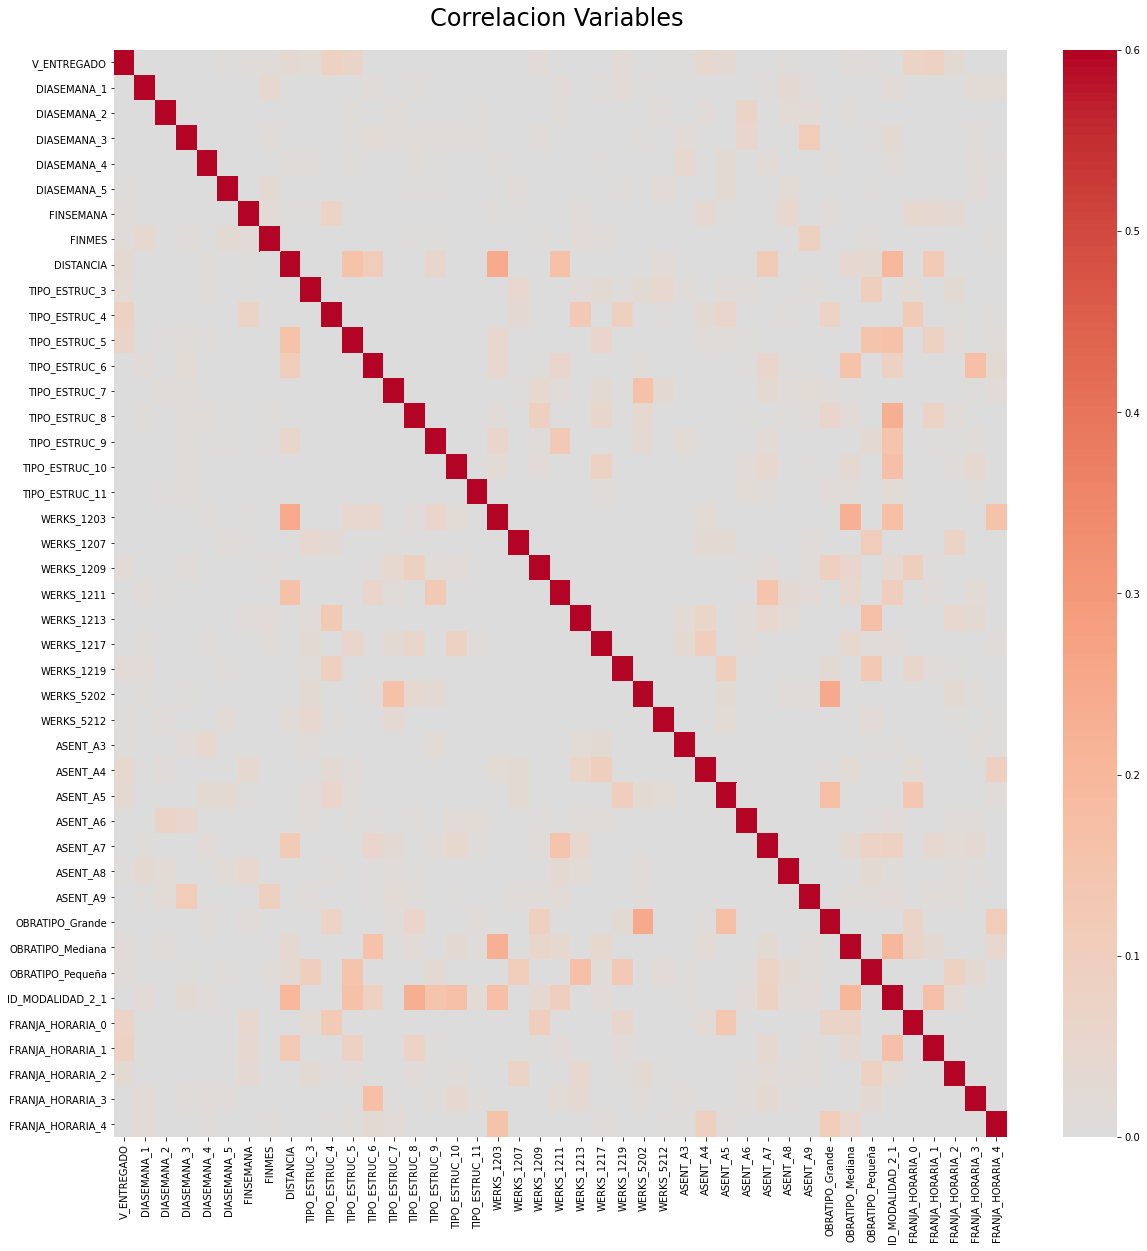

In [27]:
dfclean_indepent = dfclean[dfclean.columns[2:]] 
fig_dims = (20,20)
fig, ax = plt.subplots(figsize = fig_dims)
heatmap1 = sns.heatmap(dfclean_indepent.corr(), vmin=0, vmax=0.6, annot=False, center = 0, cmap="coolwarm")
heatmap1.set_title('Correlacion Variables ', fontdict={'fontsize':24}, pad=24)

### Primero vamos a correr un random forest regressor con el 100% de la data para obtener las mejores Features posibles y luego con ellas vamos a lanzar N modelos para identificar cual sale mejor.

In [28]:
T = dfclean[dfclean.columns.to_list()[2:]]
r = dfclean['TDESCARGATOTAL']

rf = RandomForestRegressor()
rf.fit(T,r)

rf2 = RandomForestRegressor(n_estimators = 400) # max_depth, random_state=42,
rf2.fit(T,r)

RandomForestRegressor(n_estimators=400)

In [29]:
print(rf.score(T,r), rf2.score(T,r))

0.7323937130939729 0.7339935007432916


In [30]:
importancia = pd.concat([pd.DataFrame(rf.feature_importances_).rename(columns = {0:'Valor'}),pd.DataFrame(T.columns).rename(columns = {0:'Atributo'})],axis=1)
importancia = importancia.sort_values('Valor', ascending=False).reset_index(drop=True)
importancia['Acum'] = importancia['Valor'].cumsum()
importancia

,Valor,Atributo,Acum
0,0.141227,DISTANCIA,0.141227
1,0.136095,ID_MODALIDAD_2_1,0.277322
2,0.115568,V_ENTREGADO,0.392890
3,0.038839,TIPO_ESTRUC_8,0.431728
4,0.028898,TIPO_ESTRUC_4,0.460627
5,0.028424,TIPO_ESTRUC_10,0.489051
6,0.026320,DIASEMANA_4,0.515371
7,0.025072,FRANJA_HORARIA_2,0.540443
8,0.024525,FINSEMANA,0.564967
9,0.024440,ASENT_A5,0.589407


In [31]:
importancia2 = pd.concat([pd.DataFrame(rf2.feature_importances_).rename(columns = {0:'Valor'}),pd.DataFrame(T.columns).rename(columns = {0:'Atributo'})],axis=1)
importancia2 = importancia2.sort_values('Valor', ascending=False).reset_index(drop=True)
importancia2['Acum'] = importancia2['Valor'].cumsum()
importancia2

,Valor,Atributo,Acum
0,0.141193,DISTANCIA,0.141193
1,0.137065,ID_MODALIDAD_2_1,0.278258
2,0.115043,V_ENTREGADO,0.393300
3,0.038283,TIPO_ESTRUC_8,0.431583
4,0.029057,TIPO_ESTRUC_4,0.460640
5,0.028447,TIPO_ESTRUC_10,0.489087
6,0.025859,DIASEMANA_4,0.514947
7,0.025111,FRANJA_HORARIA_2,0.540058
8,0.025048,FRANJA_HORARIA_3,0.565105
9,0.024797,ASENT_A5,0.589902


In [32]:
My_List = importancia2.Atributo.unique().tolist()
My_List

['DISTANCIA',
 'ID_MODALIDAD_2_1',
 'V_ENTREGADO',
 'TIPO_ESTRUC_8',
 'TIPO_ESTRUC_4',
 'TIPO_ESTRUC_10',
 'DIASEMANA_4',
 'FRANJA_HORARIA_2',
 'FRANJA_HORARIA_3',
 'ASENT_A5',
 'FINSEMANA',
 'DIASEMANA_3',
 'DIASEMANA_1',
 'DIASEMANA_2',
 'DIASEMANA_5',
 'TIPO_ESTRUC_9',
 'WERKS_1203',
 'FRANJA_HORARIA_1',
 'ASENT_A7',
 'FINMES',
 'WERKS_1219',
 'TIPO_ESTRUC_3',
 'OBRATIPO_Mediana',
 'WERKS_1209',
 'FRANJA_HORARIA_4',
 'TIPO_ESTRUC_5',
 'OBRATIPO_Pequeña',
 'TIPO_ESTRUC_6',
 'ASENT_A4',
 'WERKS_1217',
 'WERKS_1213',
 'FRANJA_HORARIA_0',
 'ASENT_A8',
 'TIPO_ESTRUC_7',
 'WERKS_1207',
 'OBRATIPO_Grande',
 'ASENT_A9',
 'WERKS_5202',
 'ASENT_A6',
 'WERKS_1211',
 'TIPO_ESTRUC_11',
 'ASENT_A3',
 'WERKS_5212']

# Procedemos a preparar la data para imputarla en los modelos:

In [33]:
#X = dfclean[dfclean.columns.to_list()[1:]]
X = dfclean[My_List[:30]] #
y = dfclean['TDESCARGATOTAL']
w = dfclean['PRED_T.DESC_PLANTA']
ts=0.2

X_train, X_test, y_train, y_test, w_train, w_test = train_test_split(X, y, w, test_size=ts)
print(len(X_train),len(X_test),len(y_train),len(y_test),len(w_train),len(w_test))

29038 7260 29038 7260 29038 7260


In [34]:
#Arbol de decision
def modelo_DecisionTree( X_train, y_train, X_test, y_test, w_test, p_max_depth):
    clf = tree.DecisionTreeRegressor(max_depth=p_max_depth)
    clf = clf.fit(X_train, y_train)
    predicciones = clf.predict(X_test)
    result = sqrt(mean((y_test - predicciones)**2))
    result2 = sqrt(mean((y_test - w_test)**2))
    modelo_fit = clf
    print("Modelo = DecisionTree Resultado =", result," RMSE Planta = ", result2)


#Randomforest
def modelo_RandomForest( X_trainrf, y_trainrf, X_testrf, y_testrf, w_testrf, p_n_estimators, p_max_depth, p_random_state ):
    results_rf = []
    rf = RandomForestRegressor(n_estimators=p_n_estimators, max_depth = p_max_depth, random_state=p_random_state)
    rf.fit(X_trainrf, y_trainrf)
    predictions = rf.predict(X_testrf)
    result = sqrt(mean((y_testrf - predictions)**2))
    result2 = sqrt(mean((y_testrf - w_testrf)**2))
    #results_rf.append(result)

    return print("Modelo = RandomForestRegressor Resultado = ", result," RMSE Planta = ", result2), predictions, w_testrf
    

#KNNRegressor    
def modelo_KNeighborsRegressor (X_train,y_train, X_test, y_test, w_test, p_n_neighbors):
    results_knn = []
    knn_model = KNeighborsRegressor(n_neighbors=p_n_neighbors)
    knn_model = knn_model.fit(X_train, y_train)
    predictions = knn_model.predict(X_test)
    result = sqrt(mean((y_test - predictions)**2))
    result2 = sqrt(mean((y_test - w_test)**2))
  
    print("Modelo = KNeighborsRegressor Resultado = ",result," RMSE Planta = ", result2)
    
#XGBoost
def modelo_XGBRegressor(X_train,y_train, X_test, y_test, w_test):
    xgb = XGBRegressor(subsample=1,colsample_bytree = 1,max_depth = 9)
    xgb.fit(X_train,y_train,eval_metric="rmse")
    predictions = xgb.predict(X_test)
    result = sqrt(mean((y_test - predictions)**2))
    result2 = sqrt(mean((y_test - w_test)**2))
    
    print("Modelo = XGBRegressor Resultado = ",result," RMSE Planta = ", result2)

In [35]:
#Arbol de decision
modelo_DecisionTree(X_train, y_train, X_test, y_test, w_test,5)

Modelo = DecisionTree Resultado = 28.633810907311627  RMSE Planta =  43.992249818316125


In [36]:
#Randomforest
rpta, predictions, w_test_rf = modelo_RandomForest(X_train, y_train, X_test, y_test, w_test, 400, None, p_random_state= None )
rpta

Modelo = RandomForestRegressor Resultado =  26.788140522839104  RMSE Planta =  43.992249818316125


In [37]:
#KNN
modelo_KNeighborsRegressor(X_train,y_train, X_test, y_test, w_test,3)

Modelo = KNeighborsRegressor Resultado =  28.692663111623123  RMSE Planta =  43.992249818316125


In [38]:
#XGBR
modelo_XGBRegressor(X_train,y_train, X_test, y_test, w_test)

Modelo = XGBRegressor Resultado =  26.695062123042185  RMSE Planta =  43.992249818316125


In [39]:
resultados = pd.concat([pd.Series(predictions), y_test.reset_index(drop=True), w_test_rf.reset_index(drop=True)], axis=1)
resultados.rename(columns = {0 : 'PRED'}, inplace=True )

resultados['real-preddiccionRF'] = resultados['TDESCARGATOTAL'] - resultados['PRED']
resultados['real-planta'] = resultados['TDESCARGATOTAL'] - resultados['PRED_T.DESC_PLANTA']

<AxesSubplot:xlabel='real-preddiccionRF'>

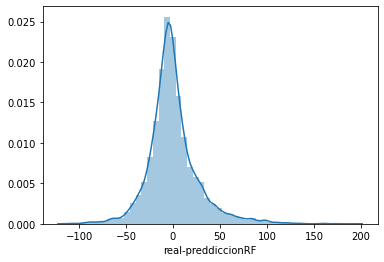

In [40]:
sns.distplot(resultados['real-preddiccionRF'])

<AxesSubplot:xlabel='real-planta'>

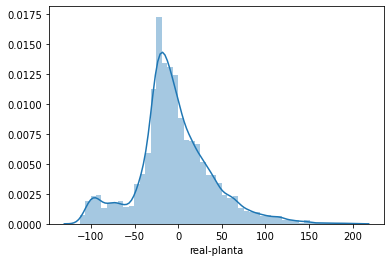

In [41]:
sns.distplot(resultados['real-planta'])

In [42]:
X_train.shape[1]
cols_n = X_train.shape[1]
inputs = Input(shape=(cols_n))
x = layers.Dense(42, activation="relu")(inputs)
x = layers.Dense(32, activation="sigmoid")(inputs)
x = layers.Dense(16, activation="sigmoid")(inputs)
predictions = layers.Dense(1, activation="sigmoid")(x)
model = Model(inputs, predictions)
model.compile(loss='MeanSquaredError', optimizer="adam", metrics=['RootMeanSquaredError'])
model.summary()
model.fit(X_train, y_train, epochs=32, validation_data=(X_test, y_test))

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 30)]              0         
_________________________________________________________________
dense_2 (Dense)              (None, 16)                496       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 513
Trainable params: 513
Non-trainable params: 0
_________________________________________________________________
Epoch 1/32
908/908 [==============================] - 2s 2ms/step - loss: 3154.9548 - root_mean_squared_error: 56.1666 - val_loss: 3207.2595 - val_root_mean_squared_error: 56.6327
Epoch 2/32
908/908 [==============================] - 1s 825us/step - loss: 3174.3803 - root_mean_squared_error: 56.3381 - val_loss: 3207.1096 - val_root_mean_squared_error: 56.6313
Epoch 3/32
908/908 [===========